<a href="https://colab.research.google.com/github/MAX181818/session/blob/main/Proyecto_CoderHouse_Juan_Guzman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ABSTRACT


Este conjunto de datos contiene información demográfica y diagnósticos de salud mental de niños que han sido víctimas de abuso sexual. Incluye datos personales, así como un registro sobre la presencia de algún trastorno mental. Este conjunto de datos es fundamental para analizar las posibles correlaciones entre el abuso sexual infantil y el desarrollo de enfermedades mentales. La información demográfica permite examinar cómo factores como la edad y la ubicación pueden influir en la prevalencia de trastornos mentales entre las víctimas. Este análisis podría contribuir a la creación de políticas y programas de apoyo más eficaces para ayudar a estas personas.


## Preguntas y Hipotesis
Pregunta: ¿La ubicación geográfica tiene un efecto en la salud mental de los niños?
Hipótesis: Se sugiere que los niños que viven en áreas con menos recursos podrían tener una mayor probabilidad de desarrollar problemas mentales, ya que a menudo enfrentan barreras en el acceso a servicios de salud y apoyo social.

Pregunta: ¿La edad influye en la probabilidad de que los niños desarrollen problemas mentales?
Hipótesis: Los niños más pequeños podrían ser más vulnerables a los trastornos mentales, ya que tienen menos herramientas para enfrentar y expresar las emociones relacionadas con experiencias traumáticas.

 Las instituciones que no cuentan con suficientes recursos o personal capacitado podrían tener una mayor incidencia de casos de abuso sexual, lo que a su vez podría contribuir a un aumento en los problemas de salud mental entre los niños que allí se encuentran.

 ## Objetivo

 Encontrar patrones de comportamientos identificables que predisponen a una a persona a sufrir de enfermedad mental
 Y generar un modelo que prediga dicha tendencia

 ## Contexto

 Los datos de recopilaron de una funcion sin animo de lucro la cual atiende niños abusados sexualmente y se les hace una entrevista para revisar su estado mental.

 ## Contexto Analitico

'Género': Masculino o Femenino
'Edad': Edad del paciente
'Zonal - Remitido_por': Centro de emergencia que remite el paciente
'Dirección': Direccion del paciente
'Localidad': Area donde reside el paciente
'Etnia': Grupo al que pertenece el paciente
'Gra_Estudio': Nivel de estudio que alcanzo el paciente
'Ori_Sexual': Orientacion sexual del paciente
'Institucion': Institucion donde vive o es atentida a la familia
'Regimen', 'Est. Cita',
       'Unnamed: 28', 'Sub Clasif.', 'enfermedad_mental'],
      dtype='object')
  

In [4]:
!pip install lxml -q
!pip install pandas scikit-learn numpy xlrd -q


In [5]:
import xml.etree.ElementTree as ET
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from datetime import datetime
import seaborn as sns

In [6]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [22]:
df=pd.read_excel('/content/drive/MyDrive/CoderHouse Juan Guzman/DATA SCIENCE I/Base_Datos_2024_91.xlsx')
df.columns

Index(['Código', 'Tipo_documento', 'Num_documento', 'Género', 'SIM',
       'Fec_Ingreso', 'Edad', 'Zonal - Remitido_por', 'Dirección', 'Teléfono',
       'Defensor', 'Terapeuta', 'Responsable', 'Clasificacion',
       'Fec_nacimiento', 'Eps', 'Fecha remision', 'Localidad',
       'Doc_Responsable', 'TipDoc_Responsable', 'Etnia', 'Gra_Estudio',
       'Ori_Sexual', 'Discapcidad', 'Institucion', 'Regimen', 'Est. Cita',
       'Unnamed: 28', 'Sub Clasif.', 'enfermedad_mental'],
      dtype='object')

Datos eliminados, se eliminan los datos que no tengan numero de documento y se elimina la columna BENEFICIARIO el cual contiene el nombre del paciente con el fin de salvaguardar la identidad del mismo

In [8]:
df = df.drop_duplicates(subset='Num_documento', keep='first')
try:
    df.drop(columns=['Tipo_documento'],inplace=True)
    df['Num_documento'] = range(1, len(df) + 1)
except:
    print('Ya fue eliminado y no se puede volver a hacer')

Estas son las columnas disponibles

In [9]:
df.columns

Index(['Código', 'Num_documento', 'Género', 'SIM', 'Fec_Ingreso', 'Edad',
       'Zonal - Remitido_por', 'Dirección', 'Teléfono', 'Defensor',
       'Terapeuta', 'Responsable', 'Clasificacion', 'Fec_nacimiento', 'Eps',
       'Fecha remision', 'Localidad', 'Doc_Responsable', 'TipDoc_Responsable',
       'Etnia', 'Gra_Estudio', 'Ori_Sexual', 'Discapcidad', 'Institucion',
       'Regimen', 'Est. Cita', 'Unnamed: 28', 'Sub Clasif.',
       'enfermedad_mental'],
      dtype='object')

Distribución de Edad por Enfermedad Mental, Se puede ver que la poblacion de mayor enfermedad mental roza los 13 años, por lo tanto, se deben hacer planes para mitirgar este riesgo de abuso sexual para niños que estan mas que todo en esa edad

<Figure size 1000x600 with 0 Axes>

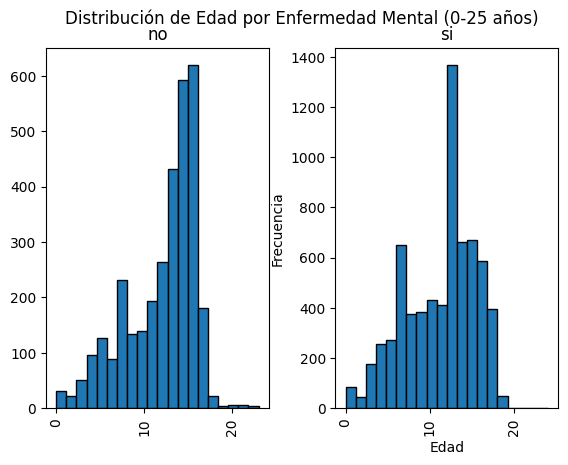

In [10]:
plt.figure(figsize=(10, 6))
df_filtered = df[df['Edad'] <= 25]
df_filtered['Edad'].hist(by=df_filtered['enfermedad_mental'], bins=20, edgecolor='black')
plt.suptitle('Distribución de Edad por Enfermedad Mental (0-25 años)')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()


Casos por Localidad, podemos ver que nos hace falta identificar la localidad de muchos casos, por lo tanto, podemos decir que la localidad de Usaquen, rafael uribel y Engativa es quien mas enfermedades mentales tiene

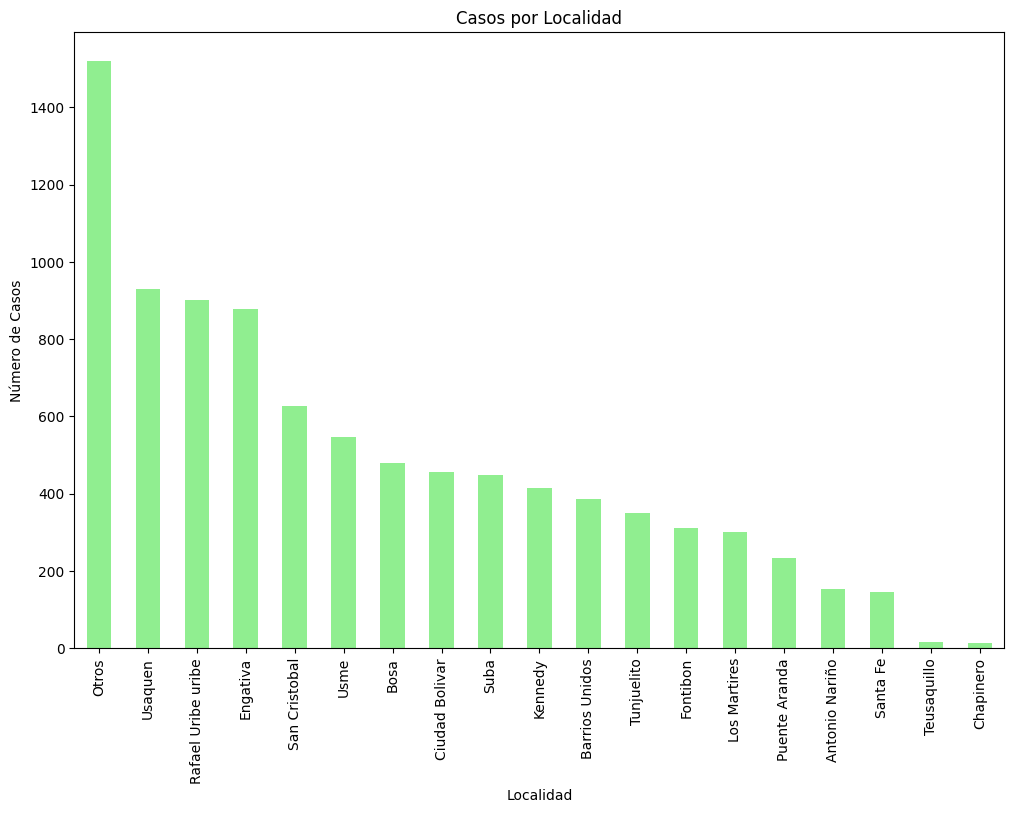

In [11]:
plt.figure(figsize=(12, 8))
df = df[df['Edad'] <= 25]
df['Localidad'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Casos por Localidad')
plt.xlabel('Localidad')
plt.ylabel('Número de Casos')
plt.xticks(rotation=90)
plt.show()


Boxplot de Edad por Enfermedad Mental, podemos ver que nuestra media de casos esta cerca a los 12 o 13 años lo cual tiene sentido con respecto a las anteriores graficas mostradas

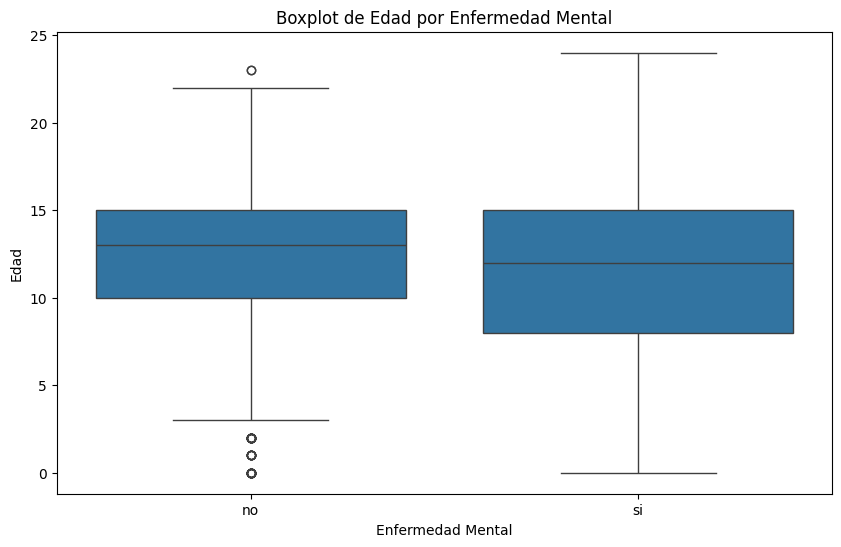

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='enfermedad_mental', y='Edad', data=df)
plt.title('Boxplot de Edad por Enfermedad Mental')
plt.xlabel('Enfermedad Mental')
plt.ylabel('Edad')
plt.show()


Indice de correlacion entre variables numericas

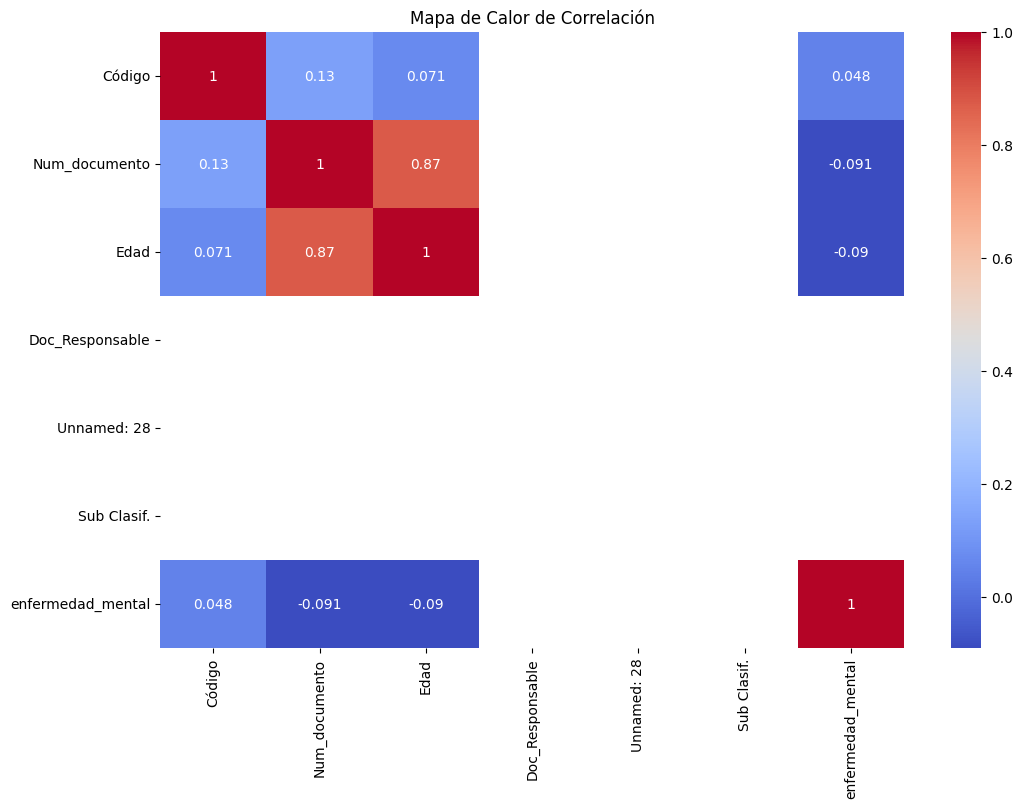

In [13]:
# Selecciona solo las columnas numéricas
df['enfermedad_mental'] = df['enfermedad_mental'].map({'si': 1, 'no': 0})

numeric_df = df.select_dtypes(include=[np.number])

# Calcula la matriz de correlación
correlation = numeric_df.corr()

# Genera el heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Mapa de Calor de Correlación')
plt.show()


Instituciones (Orfanatos) donde viven la gran cantidad de niños que tienen positivo para enfermedades mentales

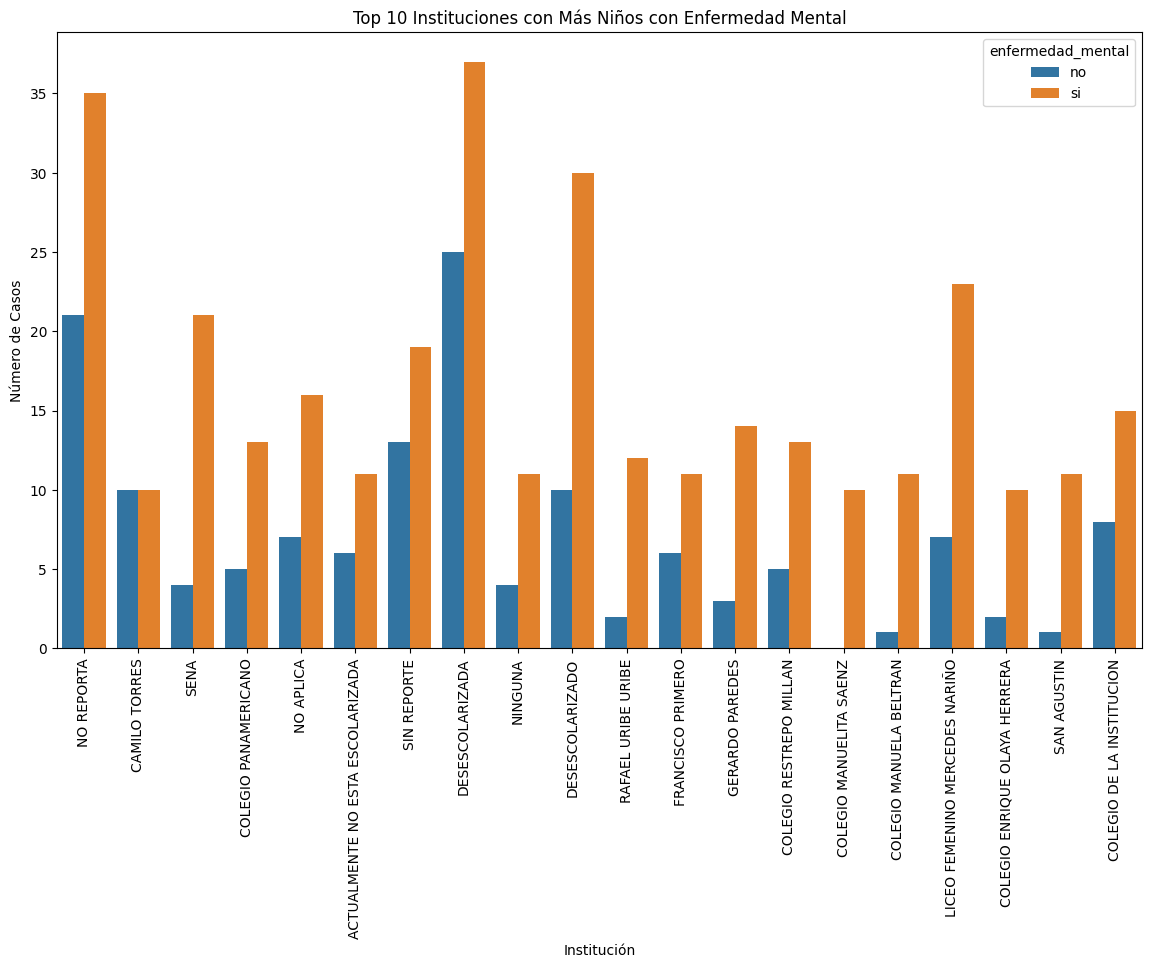

In [14]:
df['enfermedad_mental'] = df['enfermedad_mental'].map({1:'si', 0:'no'})
# Filtra el DataFrame para obtener el top 10 de instituciones con más casos de enfermedad mental

top_institutions = df[df['enfermedad_mental'] == 'si']['Institucion'].value_counts().nlargest(20).index
df_top_institutions = df[df['Institucion'].isin(top_institutions)]

# Genera el gráfico con el top 10 de instituciones
plt.figure(figsize=(14, 8))
sns.countplot(x='Institucion', hue='enfermedad_mental', data=df_top_institutions)
plt.title('Top 10 Instituciones con Más Niños con Enfermedad Mental')
plt.xlabel('Institución')
plt.ylabel('Número de Casos')
plt.xticks(rotation=90)
plt.show()

##Reduccion de dimensionalidad (RFE)

---



En este paso vamos a escoger cuales son las caracteristicas especificas que podemos encontrar que pueden ser elegidas para el entrenamiento del modelo, esto mediante el modelo de Eliminación Recursiva de Características (RFE) porque es una técnica robusta y eficaz para seleccionar las características más relevantes de tu conjunto de datos.

In [15]:
# Define las características "X" (excluyendo la columna de enfermedad_mental) y la columna de resultado "Y" o sea "enfermedad_mental"
X = df.drop(columns=['enfermedad_mental','Num_documento', 'SIM', 'Teléfono','Código', 'Responsable'])
y = df['enfermedad_mental']

In [16]:
# Convierte columnas categóricas a valores numéricos mediante labelEncoder
for column in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])

In [17]:
# Configura el modelo de clasificación vamos a utilizar randomforestClassifier
modelo = RandomForestClassifier()

# Configura el selector de características con RFE
selector = RFE(estimator=modelo, n_features_to_select=3, step=1)

# Ajusta el selector de características al conjunto de datos
selector = selector.fit(X, y)

# Selecciona las características más importantes
caracteristicas_seleccionadas = X.columns[selector.support_]

print("Características seleccionadas:", caracteristicas_seleccionadas)

Características seleccionadas: Index(['Dirección', 'Fec_nacimiento', 'Institucion'], dtype='object')


Index(['Dirección', 'Fec_nacimiento', 'Institucion'], dtype='object')
Esas fueron las caracteristicas que respecto al algotimo deben ser las utilizadas

Direccion - Edad e Institucion pero haciendo pruebas el modelo mejora con la Localidad, por lo tanto, seran las utilizadas para entrenar al modelo y cumplir con la hipotesis generada al principio de este proyecto

In [18]:
X = df[['Dirección', 'Edad','Localidad']]
y = df['enfermedad_mental']

# Convierte columnas categóricas a valores numéricos
for column in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])

# Divide el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Configura el modelo de clasificación
modelo = RandomForestClassifier()

# Ajusta el modelo al conjunto de entrenamiento
modelo.fit(X_train, y_train)

# Realiza predicciones en el conjunto de prueba
y_pred = modelo.predict(X_test)

# Evalúa el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
reporte = classification_report(y_test, y_pred)

print(f"Precisión: {accuracy}")
print("Reporte de Clasificación:")
print(reporte)

<ipython-input-18-31be89bd30de>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = le.fit_transform(X[column])
<ipython-input-18-31be89bd30de>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = le.fit_transform(X[column])


Precisión: 0.6353097052003975
Reporte de Clasificación:
              precision    recall  f1-score   support

          no       0.44      0.39      0.42      1004
          si       0.71      0.76      0.73      2015

    accuracy                           0.64      3019
   macro avg       0.58      0.57      0.58      3019
weighted avg       0.62      0.64      0.63      3019



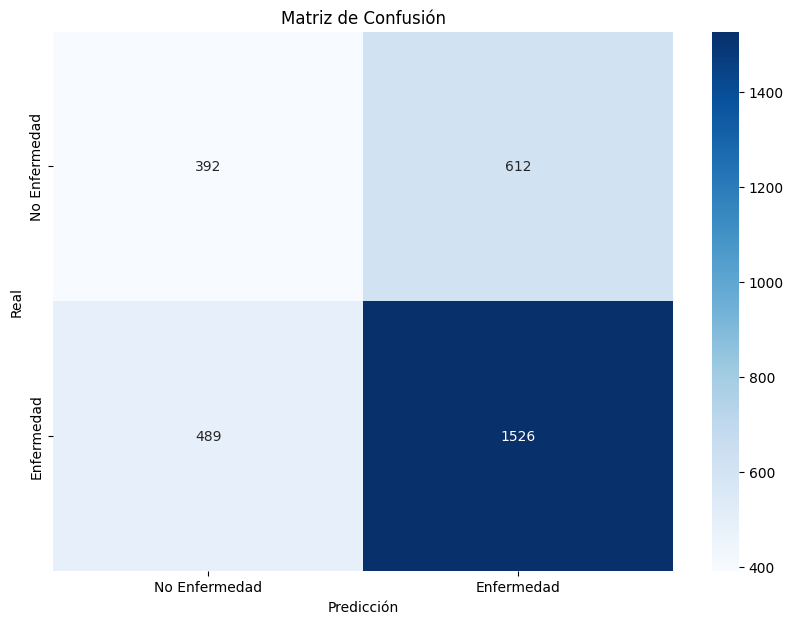

In [19]:
# Genera la matriz de confusión
matriz_confusion = confusion_matrix(y_test, y_pred)

# Visualiza la matriz de confusión
plt.figure(figsize=(10, 7))
sns.heatmap(matriz_confusion, annot=True, fmt="d", cmap="Blues", xticklabels=['No Enfermedad', 'Enfermedad'], yticklabels=['No Enfermedad', 'Enfermedad'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

In [20]:
# Define las características (X) y la columna de resultado (y)
X = df[['Dirección', 'Edad','Localidad']].copy()  # Añade .copy() para evitar SettingWithCopyWarning
y = df['enfermedad_mental']

# Preprocesamiento
categorical_features = ['Dirección','Localidad']
numerical_features = ['Edad']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', StandardScaler(), numerical_features)
    ])

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', RandomForestClassifier(random_state=42))])

# Divide el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Ajusta el modelo al conjunto de entrenamiento
pipeline.fit(X_train, y_train)

# Realiza predicciones en el conjunto de prueba
y_pred = pipeline.predict(X_test)

# Evalúa el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
reporte = classification_report(y_test, y_pred)

print(f"Precisión: {accuracy}")
print("Reporte de Clasificación:")
print(reporte)

Precisión: 0.6916197416363035
Reporte de Clasificación:
              precision    recall  f1-score   support

          no       0.67      0.15      0.24      1004
          si       0.69      0.96      0.81      2015

    accuracy                           0.69      3019
   macro avg       0.68      0.55      0.52      3019
weighted avg       0.68      0.69      0.62      3019



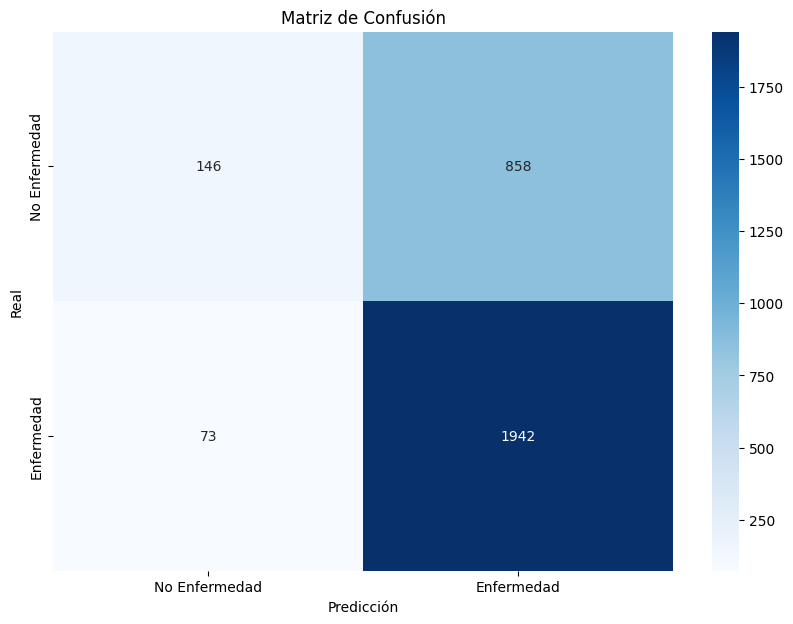

In [21]:
# Genera la matriz de confusión
matriz_confusion = confusion_matrix(y_test, y_pred)

# Visualiza la matriz de confusión
plt.figure(figsize=(10, 7))
sns.heatmap(matriz_confusion, annot=True, fmt="d", cmap="Blues", xticklabels=['No Enfermedad', 'Enfermedad'], yticklabels=['No Enfermedad', 'Enfermedad'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()